In [ ]:
#task 1 simulate a function
#i have used 2 CNN models

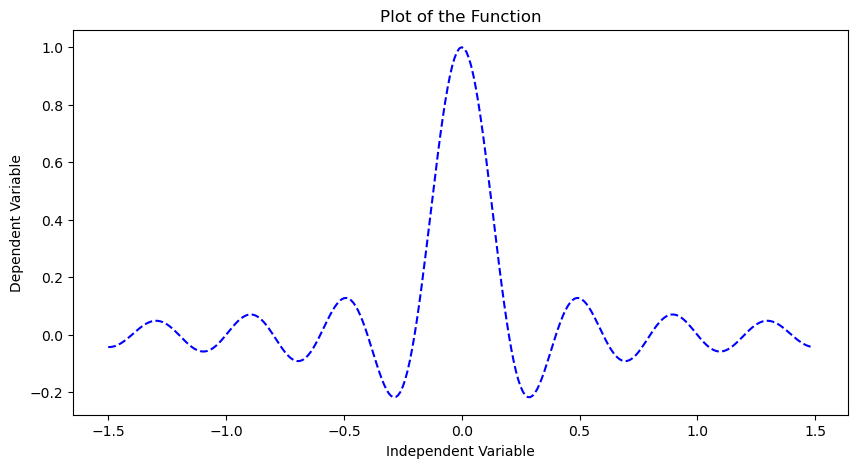

Total parameters in Model 1: 571
Current Epoch: 500
Current Loss: 0.0050
Current Accuracy: 0.8500

Current Epoch: 1000
Current Loss: 0.0028
Current Accuracy: 0.9500

Current Epoch: 1500
Current Loss: 0.0024
Current Accuracy: 0.9533

Current Epoch: 2000
Current Loss: 0.0025
Current Accuracy: 0.9600

Current Epoch: 2500
Current Loss: 0.0025
Current Accuracy: 0.9667

Current Epoch: 3000
Current Loss: 0.0024
Current Accuracy: 0.9533

Current Epoch: 3500
Current Loss: 0.0023
Current Accuracy: 0.9433

Current Epoch: 4000
Current Loss: 0.0024
Current Accuracy: 0.9533

Current Epoch: 4500
Current Loss: 0.0025
Current Accuracy: 0.9600

Current Epoch: 5000
Current Loss: 0.0025
Current Accuracy: 0.9733

Current Epoch: 5500
Current Loss: 0.0022
Current Accuracy: 1.0000

Current Epoch: 6000
Current Loss: 0.0021
Current Accuracy: 1.0000

Current Epoch: 6500
Current Loss: 0.0021
Current Accuracy: 1.0000

Current Epoch: 7000
Current Loss: 0.0020
Current Accuracy: 1.0000

Current Epoch: 7500
Current Lo

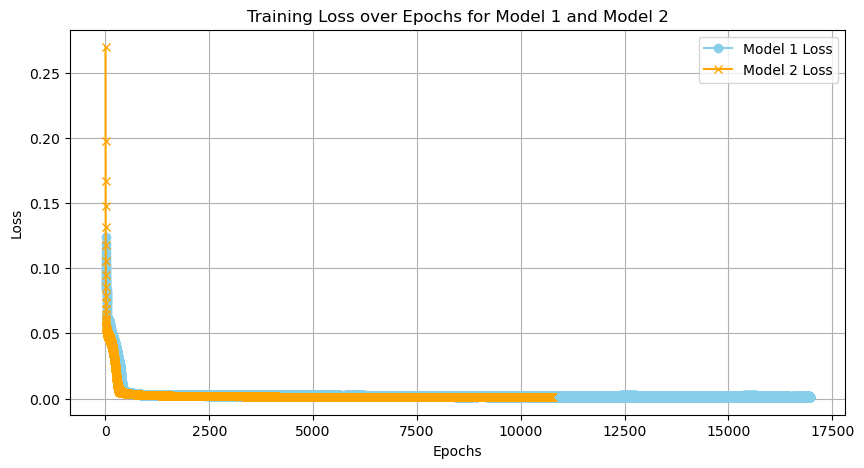

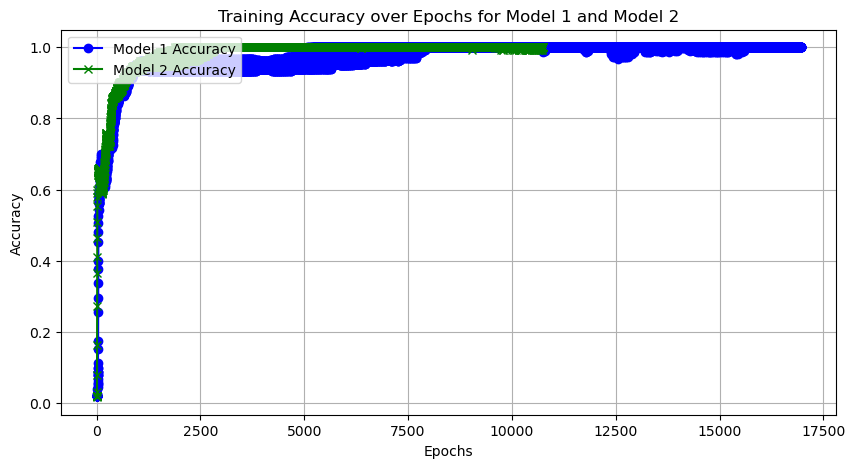

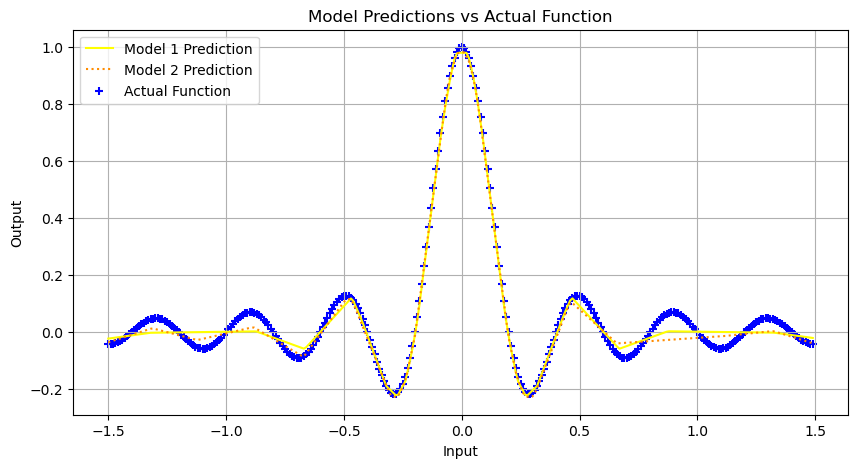

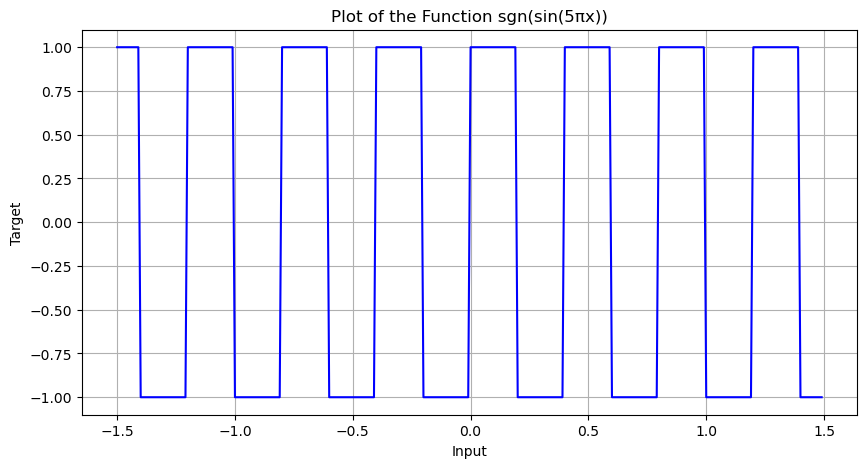


Training Model 1 on sgn(sin(5πx))
Current Epoch: 500
Current Loss: 0.6389
Current Accuracy: 0.1967

Current Epoch: 1000
Current Loss: 0.5696
Current Accuracy: 0.0733

Current Epoch: 1500
Current Loss: 0.5221
Current Accuracy: 0.2900

Current Epoch: 2000
Current Loss: 0.5345
Current Accuracy: 0.0000

Current Epoch: 2500
Current Loss: 0.4625
Current Accuracy: 0.0767

Current Epoch: 3000
Current Loss: 0.4669
Current Accuracy: 0.0233

Current Epoch: 3500
Current Loss: 0.4040
Current Accuracy: 0.0433

Current Epoch: 4000
Current Loss: 0.4020
Current Accuracy: 0.1200

Current Epoch: 4500
Current Loss: 0.3497
Current Accuracy: 0.3100

Current Epoch: 5000
Current Loss: 0.3426
Current Accuracy: 0.3267

Current Epoch: 5500
Current Loss: 0.3586
Current Accuracy: 0.0933

Current Epoch: 6000
Current Loss: 0.3905
Current Accuracy: 0.1000

Current Epoch: 6500
Current Loss: 0.3450
Current Accuracy: 0.1067

Current Epoch: 7000
Current Loss: 0.3159
Current Accuracy: 0.5033

Current Epoch: 7500
Current 

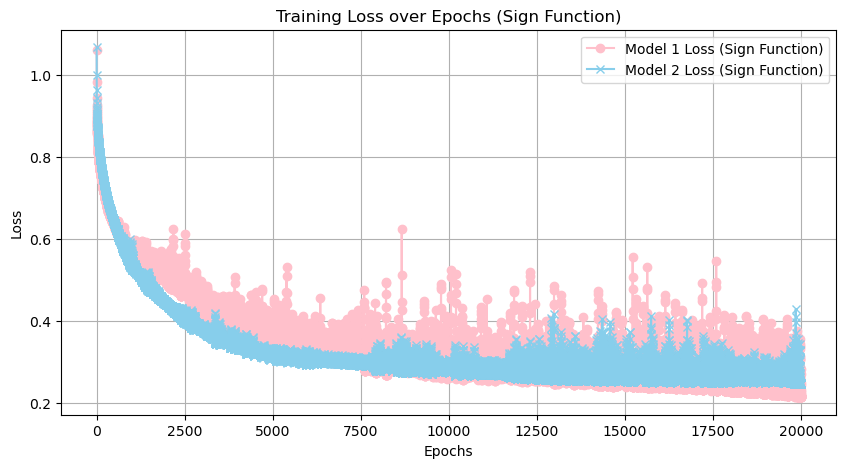

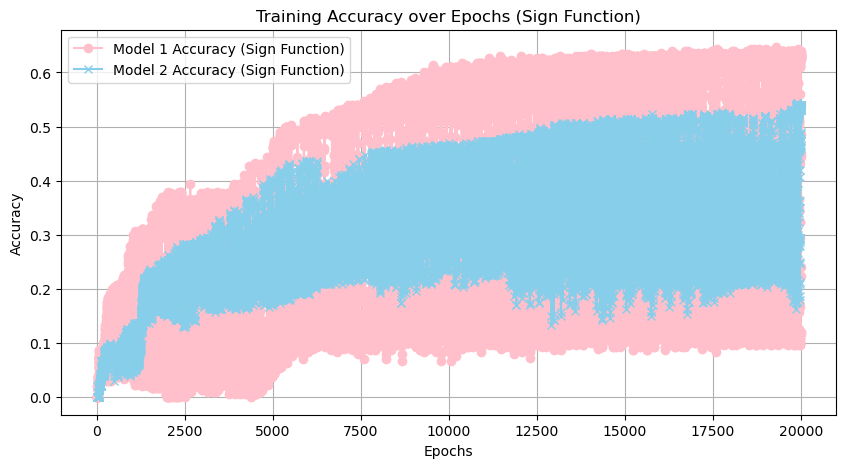

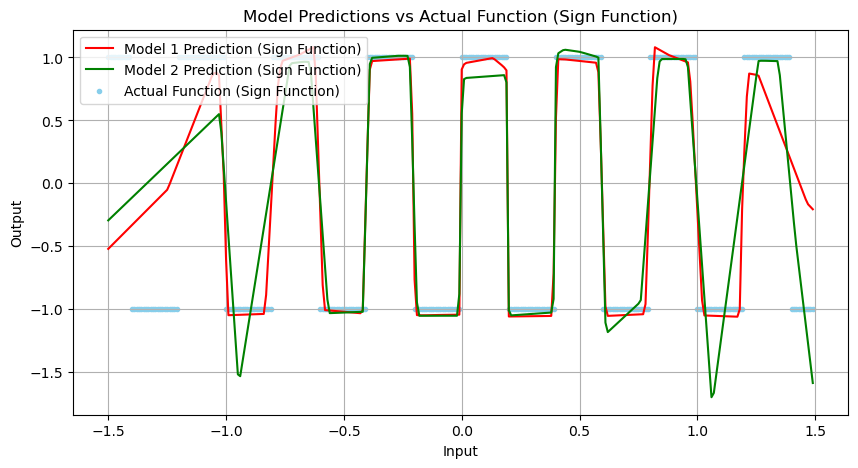

In [26]:
# Task 1
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set manual seed for reproducibility
torch.manual_seed(1)

# Generate input and target data
x_data = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
y_data = (np.sin(5 * np.pi * x_data)) / (5 * np.pi * x_data)

# Convert input and target data to tensors
x_data_tensor, y_data_tensor = torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_data, dtype=torch.float32)

# Visualize the input vs. target data
plt.figure(figsize=(10, 5))
plt.plot(x_data_tensor, y_data_tensor, color="blue", linestyle="--")
plt.title('Plot of the Function')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

# Define the training function with accuracy
def train_model_with_accuracy(model, x, y, optimizer, loss_func):
    max_epoch = 20000
    epoch_arr, loss_arr, accuracy_arr = [], [], []
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy (considering predictions close to the actual target)
        with torch.no_grad():
            correct_predictions = torch.sum(torch.abs(prediction - y) < 0.1).item()
            accuracy = correct_predictions / len(y)
        
        epoch_arr.append(epoch)
        loss_arr.append(loss.item())
        accuracy_arr.append(accuracy)

        if epoch % 500 == 0:
            print(f'Current Epoch: {epoch}')
            print(f'Current Loss: {loss.item():.4f}')
            print(f'Current Accuracy: {accuracy:.4f}')
            print()

        if epoch == max_epoch:
            print("Max epoch reached without convergence")
            not_converged = False

        elif (epoch > 5) and (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:", loss_arr[-1])
                not_converged = False

    return epoch_arr, loss_arr, accuracy_arr, prediction

# Define Model 1 layers
model1_layers = [
    nn.Linear(1, 5), nn.LeakyReLU(),
    nn.Linear(5, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 5), nn.LeakyReLU(),
    nn.Linear(5, 1)
]

# Create model instance using nn.Sequential
model1 = nn.Sequential(*model1_layers)

# Training setup for Model 1
optimizer1 = optim.RMSprop(model1.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func1 = nn.MSELoss()

# Print total parameters for Model 1
total_params_1 = sum(p.numel() for p in model1.parameters())
print(f'Total parameters in Model 1: {total_params_1}')

# Train Model 1
model1_epochs, model1_losses, model1_accuracies, model1_prediction = train_model_with_accuracy(model1, x_data_tensor, y_data_tensor, optimizer1, loss_func1)

# Define Model 2 layers
model2_layers = [
    nn.Linear(1, 10), nn.LeakyReLU(),
    nn.Linear(10, 18), nn.LeakyReLU(),
    nn.Linear(18, 15), nn.LeakyReLU(),
    nn.Linear(15, 4), nn.LeakyReLU(),
    nn.Linear(4, 1)
]

# Create model instance using nn.Sequential
model2 = nn.Sequential(*model2_layers)

# Training setup for Model 2
optimizer2 = optim.RMSprop(model2.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func2 = nn.MSELoss()

# Print total parameters for Model 2
total_params_2 = sum(p.numel() for p in model2.parameters())
print(f'Total parameters in Model 2: {total_params_2}')

# Train Model 2
model2_epochs, model2_losses, model2_accuracies, model2_prediction = train_model_with_accuracy(model2, x_data_tensor, y_data_tensor, optimizer2, loss_func2)

# Plotting the losses for both models
plt.figure(figsize=(10, 5))
plt.plot(model1_epochs, model1_losses, color="skyblue", label="Model 1 Loss", marker='o')
plt.plot(model2_epochs, model2_losses, color="orange", label="Model 2 Loss", marker='x')
plt.title('Training Loss over Epochs for Model 1 and Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot training accuracy for both models
plt.figure(figsize=(10, 5))
plt.plot(model1_epochs, model1_accuracies, color="blue", label="Model 1 Accuracy", marker='o')
plt.plot(model2_epochs, model2_accuracies, color="green", label="Model 2 Accuracy", marker='x')
plt.title('Training Accuracy over Epochs for Model 1 and Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plotting the predictions for both models compared to actual data
plt.figure(figsize=(10, 5))
plt.plot(x_data_tensor, model1_prediction.detach().numpy(), color="yellow", label='Model 1 Prediction', linestyle='-')
plt.plot(x_data_tensor, model2_prediction.detach().numpy(), color="darkorange", label='Model 2 Prediction', linestyle=':')
plt.scatter(x_data_tensor, y_data_tensor, color="blue", label='Actual Function', marker='+')
plt.title('Model Predictions vs Actual Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Re-train the models on the sign function
x_sign_data = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
y_sign_data = np.sign(np.sin(5 * np.pi * x_sign_data))
x_sign_tensor, y_sign_tensor = torch.tensor(x_sign_data, dtype=torch.float32), torch.tensor(y_sign_data, dtype=torch.float32)

plt.figure(figsize=(10, 5))
plt.plot(x_sign_tensor, y_sign_tensor, color="blue")
plt.title('Plot of the Function sgn(sin(5πx))')
plt.xlabel('Input')
plt.ylabel('Target')
plt.grid(True)
plt.show()

# Train Model 1 on sgn(sin(5πx))
print("\nTraining Model 1 on sgn(sin(5πx))")
epochs_1_sign, losses_1_sign, accuracies_1_sign, prediction_1_sign = train_model_with_accuracy(model1, x_sign_tensor, y_sign_tensor, optimizer1, loss_func1)

# Train Model 2 on sgn(sin(5πx))
print("\nTraining Model 2 on sgn(sin(5πx))")
epochs_2_sign, losses_2_sign, accuracies_2_sign, prediction_2_sign = train_model_with_accuracy(model2, x_sign_tensor, y_sign_tensor, optimizer2, loss_func2)

# Plot the loss for both models on the new function
plt.figure(figsize=(10, 5))
plt.plot(epochs_1_sign, losses_1_sign, color="pink", label="Model 1 Loss (Sign Function)", marker='o')
plt.plot(epochs_2_sign, losses_2_sign, color="skyblue", label="Model 2 Loss (Sign Function)", marker='x')
plt.title('Training Loss over Epochs (Sign Function)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot training accuracy for both models on the new function
plt.figure(figsize=(10, 5))
plt.plot(epochs_1_sign, accuracies_1_sign, color="pink", label="Model 1 Accuracy (Sign Function)", marker='o')
plt.plot(epochs_2_sign, accuracies_2_sign, color="skyblue", label="Model 2 Accuracy (Sign Function)", marker='x')
plt.title('Training Accuracy over Epochs (Sign Function)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plot the final predictions for both models on the new function
plt.figure(figsize=(10, 5))
plt.plot(x_sign_tensor, prediction_1_sign.detach().numpy(), color="red", label='Model 1 Prediction (Sign Function)', linestyle='-')
plt.plot(x_sign_tensor, prediction_2_sign.detach().numpy(), color="green", label='Model 2 Prediction (Sign Function)', linestyle='-')
plt.scatter(x_sign_tensor, y_sign_tensor, color="skyblue", label='Actual Function (Sign Function)', marker='.')
plt.title('Model Predictions vs Actual Function (Sign Function)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
